In [1]:
import sys                                        
import os                                         
                                                  
os.nice(20)                                       
                                                  
import warnings                                   
warnings.filterwarnings("ignore")                 
                       
import math
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt      
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
                                                  
# Local helper script                             
#hnlDIR = os.environ['HNLPATH']                
sys.path.append('./')   
                                                 
from Plotting import *                            
from Dictionary import *                                               

In [2]:
elec_mass = 0.0005109989461
muon_mass = 0.1056583745
kplus_mass = 0.493677 
piplus_mass = 0.13957039
pizero_mass = 0.1349768


Gfermi = 1.166379e-5
fpion = 0.1302
abs_Vud_squared = 0.97370 * 0.97370

#Couplings
fine_structure_constant = 7.2973525693e-3 # https://pdg.lbl.gov/2019/reviews/rpp2019-rev-phys-constants.pdf
higgs_vev = 1. / np.sqrt(np.sqrt(2)*Gfermi) # GeV (246.22)
sin2thetaW = 0.2312 # electroweak mixing angle https://pdg.lbl.gov/2020/reviews/rpp2020-rev-phys-constants.pdf
gL = -0.5 + sin2thetaW;
gR = sin2thetaW;

In [15]:
def kinematics_factor_kplus(lep_mass, hnl_mass):
    x = (lep_mass * lep_mass) / (kplus_mass * kplus_mass)
    y = (hnl_mass * hnl_mass) / (kplus_mass * kplus_mass)

    A = (x + y - (x - y)**2)
    B = np.sqrt( 1 + x**2 + y**2 - 2 * (x + y + x*y))
    C = x*(1 - x)**2
    
    kinematic_factor = (A * B) / C
    return kinematic_factor

In [16]:
def kinematics_factor_piplus(lep_mass, hnl_mass):
    x = (lep_mass * lep_mass) / (piplus_mass * piplus_mass)
    y = (hnl_mass * hnl_mass) / (piplus_mass * piplus_mass)

    A = (x + y - (x - y)**2)
    B = np.sqrt( 1 + x**2 + y**2 - 2 * (x + y + x*y))
    C = x*(1 - x)**2
    
    kinematic_factor = (A * B) / C
    return kinematic_factor

In [50]:
dfp_e_x = np.arange(0,piplus_mass-elec_mass, 0.0000002)
dfp_e_y = kinematics_factor_piplus(elec_mass, dfp_e_x)

In [51]:
dfp_mu_x = np.arange(0,piplus_mass-muon_mass, 0.00002)
dfp_mu_y = kinematics_factor_piplus(muon_mass, dfp_mu_x)

In [52]:
dfk_e_x = np.arange(0,kplus_mass-elec_mass, 0.000002)
dfk_e_y = kinematics_factor_kplus(elec_mass, dfk_e_x)

In [53]:
dfk_mu_x = np.arange(0,kplus_mass-muon_mass, 0.00002)
dfk_mu_y = kinematics_factor_kplus(muon_mass, dfk_mu_x)

In [93]:
493 -475

18

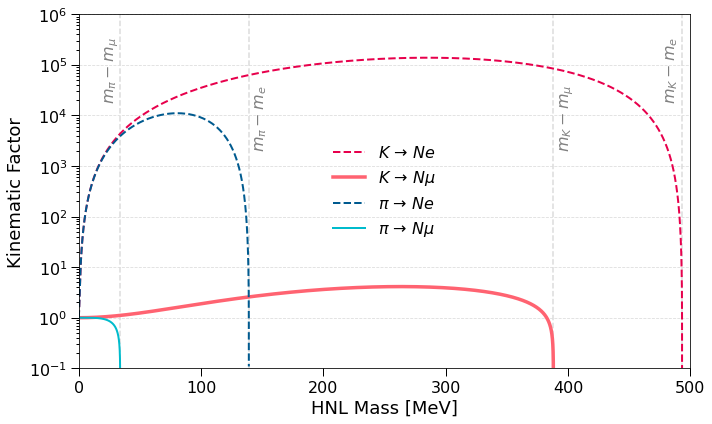

In [121]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
#-------------------------------------------------------------------

ax.axvline(x=34, color='gainsboro', linewidth = 1.5, linestyle = "--")

ax.axvline(x=139, color='gainsboro', linewidth = 1.5, linestyle = "--")

ax.axvline(x=388, color='gainsboro', linewidth = 1.5, linestyle = "--")

ax.axvline(x=493, color='gainsboro', linewidth = 1.5, linestyle = "--")
#-------------------------------------------------------------------
plot_line(
            dfk_e_x*1000, dfk_e_y,
            ax,
            xlimmin = 0, xlimmax = 500,
            color = col_dict["Coral"],
            linestyle = "--", lw = 2,
            ifysci = True,
            iflabelbox = True, label = "$K$ → $Ne$", 
            )
#-------------------------------------------------------------------
plot_line(
            dfk_mu_x*1000, dfk_mu_y,
            ax,
            xlimmin = 0, xlimmax = 500,
            color = col_dict["Flamingo"],
            linestyle = "-", lw = 3.5,
            ifysci = True,
            iflabelbox = True, label = "$K$ → $N\mu$", 
            )
#-------------------------------------------------------------------
plot_line(
            dfp_e_x*1000, dfp_e_y,
            ax,
            xlimmin = 0, xlimmax = 500,
            color = col_dict["Teal"],
            linestyle = "--", lw = 2,
            ifysci = True,
            iflabelbox = True, label = "$\pi$ → $Ne$", 
            )


#-------------------------------------------------------------------
plot_line(
            dfp_mu_x*1000, dfp_mu_y,
            ax,
            xlimmin = 0, xlimmax = 500,
            color = col_dict["Aqua"],
            linestyle = "-", lw = 2,
            ifysci = True,
            iflabelbox = True, label = "$\pi$ → $N\mu$", 
            )

#-------------------------------------------------------------------
#plt.grid(color='gainsboro', linestyle='--')

plt.xlim(0, 500)
plt.ylim(10**-1, 10**6)
ax.tick_params(bottom = True, top = False, left = True, right = False) 
plt.legend(ncol=1, loc="center",fontsize =16, frameon=False, columnspacing=0.5)


#-------------------------------------------------------------------
ax.set_xlabel("HNL Mass [MeV]", fontsize =18)
ax.set_ylabel("Kinematic Factor", fontsize =18)
plt.grid(color='gainsboro', linestyle='--', axis = "y")
#-------------------------------------------------------------------

ax.text(34-14, 80000, "$m_{\pi}-m_{\mu}$", rotation=90, va='center', fontsize = 16, color = "gray")

ax.text(139+4, 9000, "$m_{\pi}-m_{e}$", rotation=90, va='center', fontsize = 16, color = "gray")

ax.text(388+4, 9000, "$m_{K}-m_{\mu}$", rotation=90, va='center', fontsize = 16, color = "gray")

ax.text(493-14, 80000, "$m_{K}-m_{e}$", rotation=90, va='center', fontsize = 16, color = "gray")
#-------------------------------------------------------------------

fig.tight_layout()
fig.savefig("./kinematics_factor.png", dpi=200)
plt.show()

In [56]:
def Lambda(a, b, c):
    return a*a + b*b + c*c - 2*a*b - 2*b*c - 2*c*a


In [57]:
import scipy.integrate as integrate
from scipy.integrate import quad

In [58]:
def I1_integrand(s, x, y ,z):
    return 12.*(s - x*x - y*y)*(1 + z*z - s)*np.sqrt(Lambda(s,x*x,y*y)*Lambda(1.,s,z*z))/s
  
def I1(x, y, z):
    return quad(I1_integrand, (x+y)*(x+y), (1.-z)*(1.-z), args=(x,y,z))[0]
  


In [59]:
def I2_integrand(s, x, y ,z):
    return 24*y*z*(1. + x*x - s)*np.sqrt(Lambda(s,y*y,z*z)*Lambda(1,s,x*x))/s
    
def I2(x, y, z):
    return quad(I2_integrand, (y+z)*(y+z), (1.-x)*(1.-x), args=(x,y,z))[0]

In [60]:
def LepPiWidth(hnl_mass, u4, lep_mass):

    lep_ratio = (lep_mass * lep_mass) / (hnl_mass * hnl_mass);
    pion_ratio = (piplus_mass * piplus_mass) / (hnl_mass * hnl_mass);
    Ifunc = ((1+lep_ratio-pion_ratio)*(1+lep_ratio)-4*lep_ratio) * np.sqrt(Lambda(1.,lep_ratio,pion_ratio))
    Ifunc = (1-pion_ratio-lep_ratio*(2+pion_ratio-lep_ratio)) * np.sqrt(Lambda(1.,pion_ratio,lep_ratio))
    Ifunc = ((1-lep_ratio)*(1-lep_ratio)-pion_ratio*(1+lep_ratio)) * np.sqrt(Lambda(1.,lep_ratio,pion_ratio))
  
    width = u4 * (Gfermi * Gfermi *fpion * fpion * abs_Vud_squared * hnl_mass * hnl_mass * hnl_mass * Ifunc) / (16 * math.pi);
  
    # Majorana gets an extra factor b.c. it can go to pi+l- and pi-l+
    if (fMajorana):
        width *= 2
    
    if (lep_mass + piplus_mass > hnl_mass):
        width = 0
        
    return width

In [61]:
def TriNuDecayWidth(hnl_mass, u4tot):
    hnl_mass_pow5 = hnl_mass*hnl_mass*hnl_mass*hnl_mass*hnl_mass
    width=Gfermi*Gfermi*hnl_mass_pow5*u4tot / (192*math.pi*math.pi*math.pi)
    if (fMajorana):
        width *= 2
  
    return width

In [62]:
def NuGammaDecayWidth(hnl_mass, u4tot):
    
    hnl_mass_pow5 = hnl_mass*hnl_mass*hnl_mass*hnl_mass*hnl_mass
    
    width=Gfermi*Gfermi*hnl_mass_pow5*u4tot / (192*math.pi*math.pi*math.pi) * ((27 * fine_structure_constant ) / (32*math.pi))

    if (fMajorana):
        width *= 2
  
    return width

In [63]:
def NuP0DecayWidth(hnl_mass, u4tot, m0_mass, m0_decay_const):
    hnl_mass_pow3 = hnl_mass*hnl_mass*hnl_mass
    mu_m0 = m0_mass*m0_mass/(hnl_mass*hnl_mass)
    
    #width=Gfermi*Gfermi*hnl_mass_pow3*m0_decay_const*m0_decay_const*u4tot*(1-mu_m0)*(1-mu_m0) / (64*math.pi);
    
    width=Gfermi*Gfermi*hnl_mass_pow3*m0_decay_const*m0_decay_const*u4tot*(1-mu_m0)*(1-mu_m0) / (32*math.pi)
    
    if (fMajorana):
        width *= 2
    
    if (m0_mass > hnl_mass):
        width = 0
        
    return width

In [64]:
def NuDiLepDecayWidth(hnl_mass, u4, nu_pdg, lep_pdg):
    
    hnl_mass_pow5 = hnl_mass*hnl_mass*hnl_mass*hnl_mass*hnl_mass
    
    if (lep_pdg == 13):
        lep_mass = muon_mass
    elif (lep_pdg == 11):
        lep_mass = elec_mass
  
    CC = (lep_pdg+1 == nu_pdg)
  
    I1val = I1(0., lep_mass / hnl_mass, lep_mass / hnl_mass);
    I2val = I2(0., lep_mass / hnl_mass, lep_mass / hnl_mass);
    
    width = ((Gfermi * Gfermi * hnl_mass_pow5) * u4 * ((gL * gR + CC * gR) * I2val + (gL * gL + gR * gR + CC * (1 + 2. * gL)) * I1val) / (192 * math.pi * math.pi * math.pi))

    if (fMajorana):
        width *= 2;

    if (hnl_mass < lep_mass * 2.):
        width = 0.

    return width


In [65]:
def Nul1l2Width(hnl_mass, ue4, um4, ut4, lepplus_pdg, lepminus_pdg):
    hnl_mass_pow5 = hnl_mass*hnl_mass*hnl_mass*hnl_mass*hnl_mass
    lepplus_mass=0
    lepminus_mass=0
    
    if (lepminus_pdg==abs(1)):
        lepminus_mass= elec_mass
    
    if(lepminus_pdg==abs(13)):
        lepminus_mass= muon_mass
        
    if(lepplus_pdg==abs(11)):
        lepplus_mass=elec_mass
        
    if(lepplus_pdg==abs(13)):
        lepplus_mass=muon_mass
    
    u4minus=0
    if(lepminus_pdg==abs(11)): 
        u4minus=ue4
    
    if(lepminus_pdg==abs(13)):
        u4minus=um4
        
    if(lepminus_pdg==abs(15)): 
        u4minus=ut4
        
    I1val1 = I1(lepminus_mass / hnl_mass,0, lepplus_mass / hnl_mass)
    
    width = (Gfermi*Gfermi*hnl_mass_pow5) * (u4minus * I1val1)/(192*math.pi*math.pi*math.pi)
    
    if (fMajorana): 
        width *= 2
    
    if (lepminus_mass+lepplus_mass > hnl_mass):
        width = 0
    
    return width;


In [66]:
fMajorana = True

In [67]:
dfm = np.arange(0, 0.5, 0.001)

trinu = []
nupi0 = []
nugam = []

#e
epi = []
numumu_e = []
nuee_e = []
numue_e = []

#mu
mupi = []
numumu_mu = []
nuee_mu = []
numue_mu = []

In [68]:
for m in dfm:

    trinu.append(TriNuDecayWidth(m, 1))
    nupi0.append(NuP0DecayWidth(m, 1, pizero_mass, fpion))
    nugam.append(NuGammaDecayWidth(m, 1))
    
    epi.append(LepPiWidth(m, 1, elec_mass))
    numumu_e.append(NuDiLepDecayWidth(m, 1, 12, 13))
    nuee_e.append(NuDiLepDecayWidth(m, 1, 12, 11))
    numue_e.append(Nul1l2Width(m, 1,0,0,11,13)+Nul1l2Width(m, 1,0,0,13,11))
    
    mupi.append(LepPiWidth(m, 1, muon_mass))
    numumu_mu.append(NuDiLepDecayWidth(m, 1, 14, 13))
    nuee_mu.append(NuDiLepDecayWidth(m, 1, 14, 11))
    numue_mu.append(Nul1l2Width(m, 0, 1, 0,11,13)+Nul1l2Width(m, 0,1,0,13,11))

In [69]:
trinu = np.array(trinu)
nupi0 = np.array(nupi0)
nugam = np.array(nugam)

#e
epi = np.array(epi)
numumu_e = np.array(numumu_e)
nuee_e = np.array(nuee_e)
numue_e = np.array(numue_e)

#mu
mupi = np.array(mupi)
numumu_mu = np.array(numumu_mu)
nuee_mu = np.array(nuee_mu)
numue_mu = np.array(numue_mu)

In [70]:
total_width_e = epi + numumu_e + nuee_e + numue_e + trinu + nupi0 + nugam

epi = epi/total_width_e
trinu_e = trinu/total_width_e
nupi0_e = nupi0/total_width_e
nugam_e = nugam/total_width_e
numumu_e = numumu_e/total_width_e
nuee_e = nuee_e/total_width_e
numue_e = numue_e/total_width_e

In [71]:
total_width_mu = mupi + numumu_mu + nuee_mu + numue_mu + trinu + nupi0 + nugam

mupi = mupi/total_width_mu
trinu_mu = trinu/total_width_mu
nupi0_mu = nupi0/total_width_mu
nugam_mu = nugam/total_width_mu
numumu_mu = numumu_mu/total_width_mu
nuee_mu = nuee_mu/total_width_mu
numue_mu = numue_mu/total_width_mu

In [72]:
def plot_contour(channel, label, c, ax , ls, lw):

    plot_line(
            dfm*1000, channel,
            ax,
            xlimmin = 0, xlimmax = 500,
            color = c,
            linestyle = ls, lw = lw,
            ifysci = True,
            iflabelbox = True, label = label, 
            )

In [73]:
c_mupi = col_dict["Aqua"]
c_epi = col_dict["Teal"]
c_numumu = col_dict["DeepViolet"]
c_nuee = col_dict["Lavender"]
c_numue = col_dict["Purple"]
c_trinu = col_dict["PastelGreen"] 
c_gam = "darkgray"
c_nupi0 = col_dict["Flamingo"]

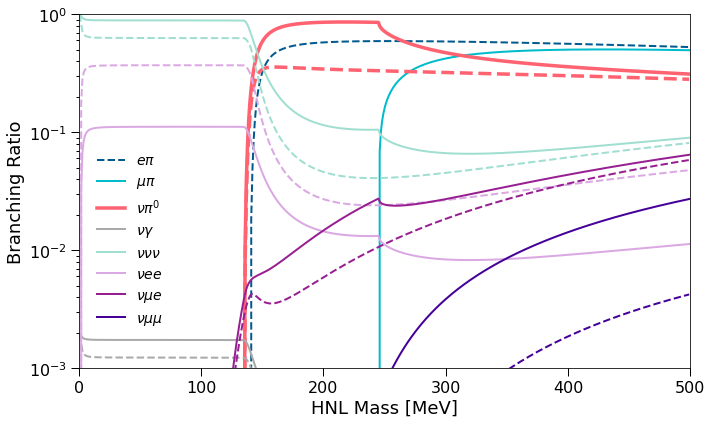

In [119]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
#-------------------------------------------------------------------
plot_contour(epi, "$e\pi$", c_epi, ax , "--", 2)
plot_contour(mupi, "$\mu\pi$", c_mupi, ax , "-", 2)

plot_contour(nupi0_mu, "$\\nu \pi^{0}$", c_nupi0, ax , "-", 3.5)
plot_contour(nupi0_e, "", c_nupi0, ax , "--", 3.5)

plot_contour(nugam_mu, "$\\nu \gamma$", c_gam, ax , "-", 2)
plot_contour(nugam_e, "", c_gam, ax , "--", 2)


plot_contour(trinu_mu, "$\\nu \\nu \\nu$", c_trinu, ax , "-", 2)
plot_contour(trinu_e, "", c_trinu, ax , "--", 2)

plot_contour(nuee_mu, "$\\nu ee$", c_nuee, ax , "-", 2)
plot_contour(nuee_e, "", c_nuee, ax , "--", 2)

plot_contour(numue_mu, "$\\nu \mu e$", c_numue, ax , "-", 2)
plot_contour(numue_e, "",c_numue, ax , "--", 2)

plot_contour(numumu_mu, "$\\nu \mu \mu$", c_numumu, ax , "-", 2)
plot_contour(numumu_e, "", c_numumu, ax , "--", 2)

#-------------------------------------------------------------------
#plt.grid(color='gainsboro', linestyle='--')

plt.xlim(0, 500)
plt.ylim(10**-3, 10**0)
ax.tick_params(bottom = True, top = False, left = True, right = False) 
plt.legend(ncol=1, loc=(0.02, 10**-1),fontsize =14, frameon=False, columnspacing=0.5)


#-------------------------------------------------------------------
ax.set_xlabel("HNL Mass [MeV]", fontsize =18)
ax.set_ylabel("Branching Ratio", fontsize =18)
#ax.grid(color='gainsboro', linestyle='--', axis = "y")

#-------------------------------------------------------------------

fig.tight_layout()

fig.savefig("./branching_ratio.png", dpi=200)
plt.show()